In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student-mat.csv')

# Data Shape

In [3]:
data.shape

(395, 33)

# Data Types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

# Data Header

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Numrical Fields Summary

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Exploratory Data Analysis

## Class Distribution

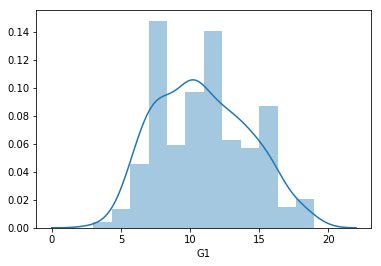

In [7]:
sns.distplot(data['G1'])

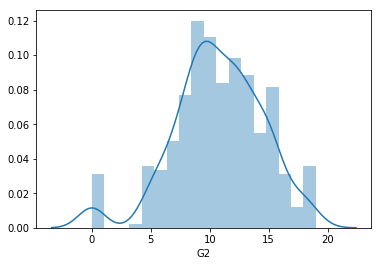

In [8]:
sns.distplot(data['G2'])

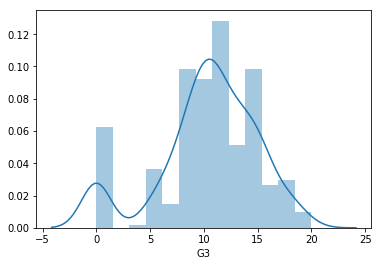

In [9]:
sns.distplot(data['G3'])

## Misssing Data

In [10]:
print('Data:', data.isnull().values.any())

Data: False


# Feature Engineering

### Grade Rankinks

In [11]:
bins = [0, 10, 15, 20]
labels = ["Bad", "Average", "Good"]
data['Ranking'] = pd.cut(data['G3'], bins=bins, labels=labels)

In [12]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Ranking
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Bad
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Bad
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Bad
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Average
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Bad


## Numerical Features Analysis

### Univariate Plots Distribution

#### Age

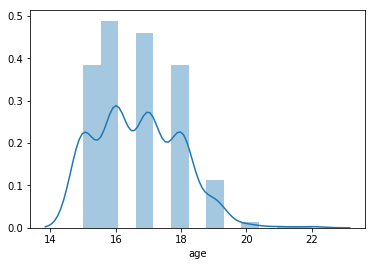

In [13]:
sns.distplot(data['age'])

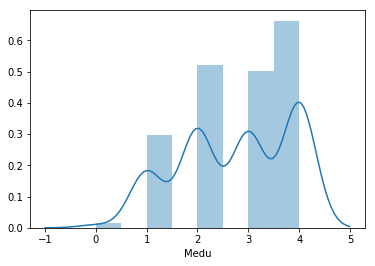

In [14]:
sns.distplot(data['Medu'])

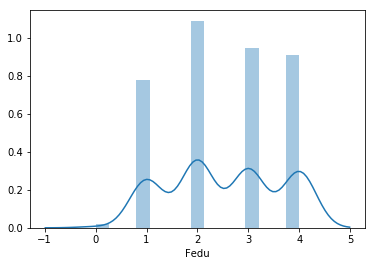

In [15]:
sns.distplot(data['Fedu'])

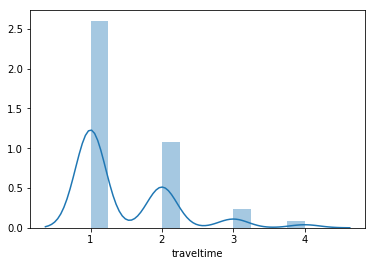

In [16]:
sns.distplot(data['traveltime'])

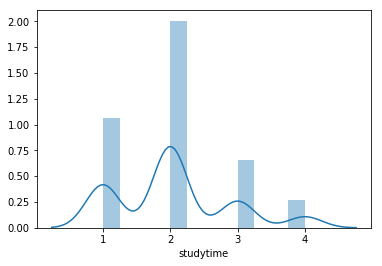

In [17]:
sns.distplot(data['studytime'])

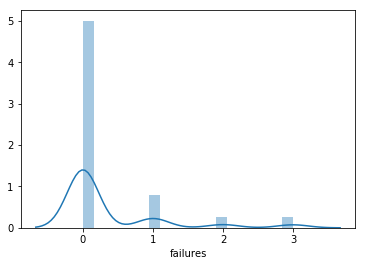

In [18]:
sns.distplot(data['failures'])

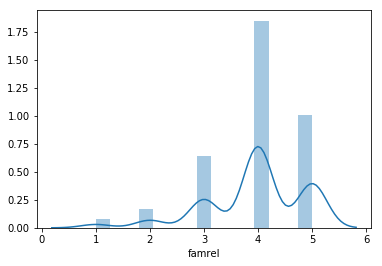

In [19]:
sns.distplot(data['famrel'])

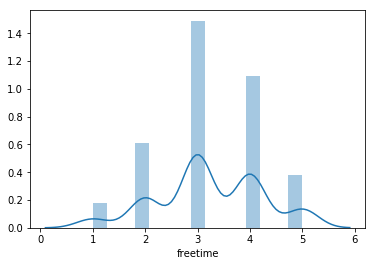

In [20]:
sns.distplot(data['freetime'])

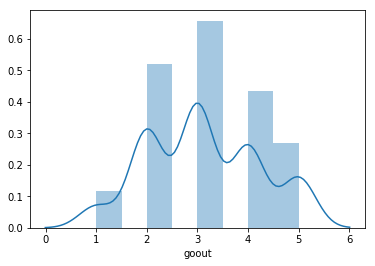

In [21]:
sns.distplot(data['goout'])

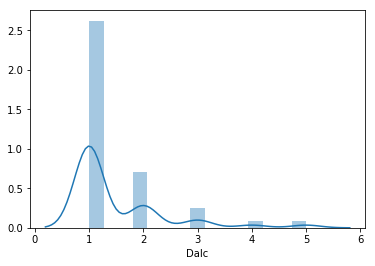

In [22]:
sns.distplot(data['Dalc'])

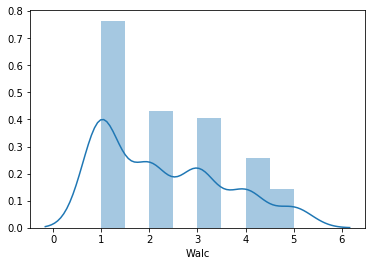

In [23]:
sns.distplot(data['Walc'])

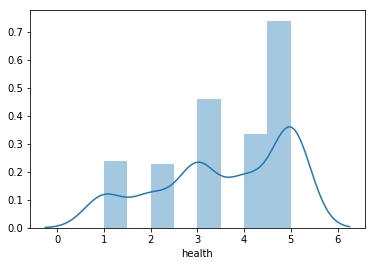

In [24]:
sns.distplot(data['health'])

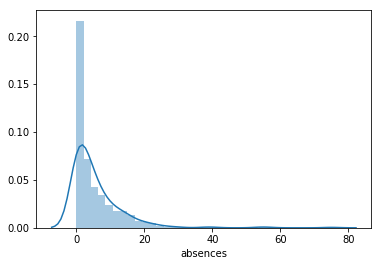

In [25]:
sns.distplot(data['absences'])

### Multivariate plots

##### Freetime & Studytime

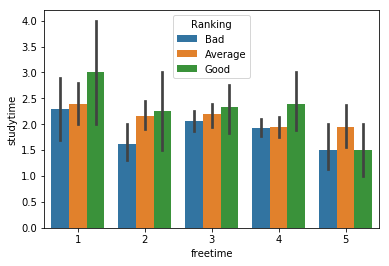

In [26]:
sns.barplot(x="freetime", y="studytime", hue="Ranking", data=data)

#### Medu & Mjob

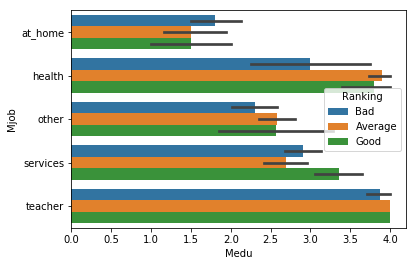

In [27]:
sns.barplot(x="Medu", y="Mjob", hue="Ranking", data=data)

#### Fedu & Fjob

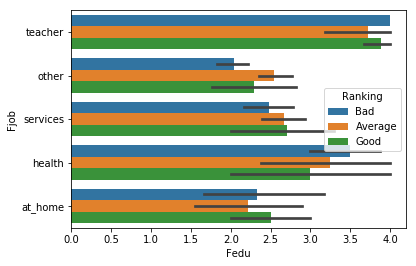

In [28]:
sns.barplot(x="Fedu", y="Fjob", hue="Ranking", data=data)

#### Studytime & Traveltime

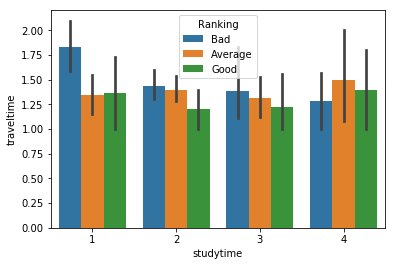

In [29]:
sns.barplot(x="studytime", y="traveltime", hue="Ranking", data=data)

#### famsize & studytime

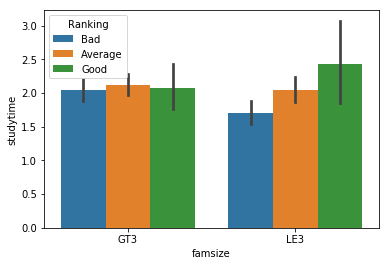

In [30]:
sns.barplot(x="famsize", y="studytime", hue="Ranking", data=data)

#### sex & Overall Grade

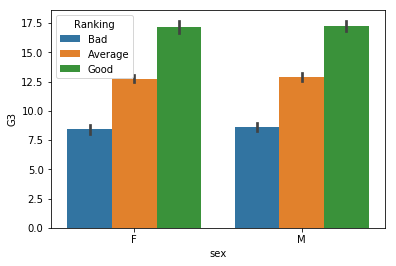

In [31]:
sns.barplot(x="sex", y="G3", hue="Ranking", data=data)

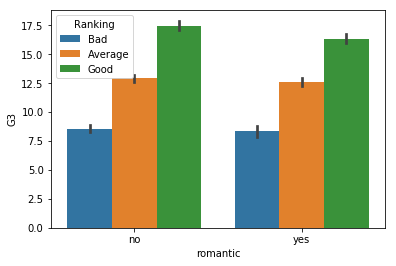

In [32]:
sns.barplot(x="romantic", y="G3", hue="Ranking", data=data)

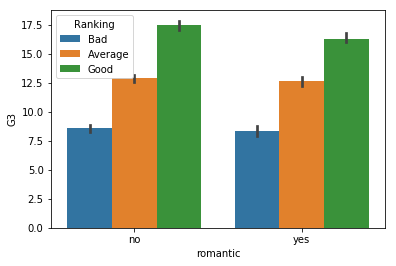

In [33]:
sns.barplot(x="romantic", y="G3", hue="Ranking", data=data)

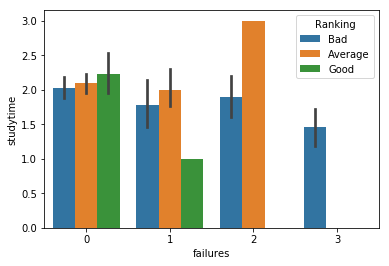

In [34]:
sns.barplot(x="failures", y="studytime", hue="Ranking", data=data)

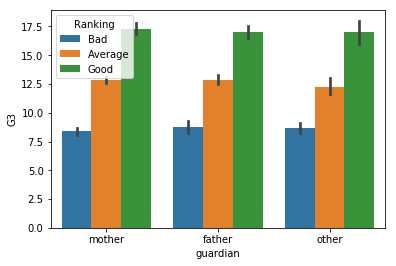

In [35]:
sns.barplot(x="guardian", y="G3", hue="Ranking", data=data)

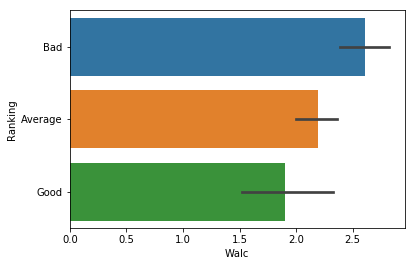

In [36]:
sns.barplot(x="Walc", y="Ranking", data=data)

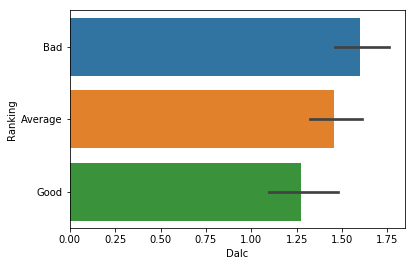

In [37]:
sns.barplot(x="Dalc", y="Ranking", data=data)

# Correlations

In [38]:
data.corr(method='pearson')['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

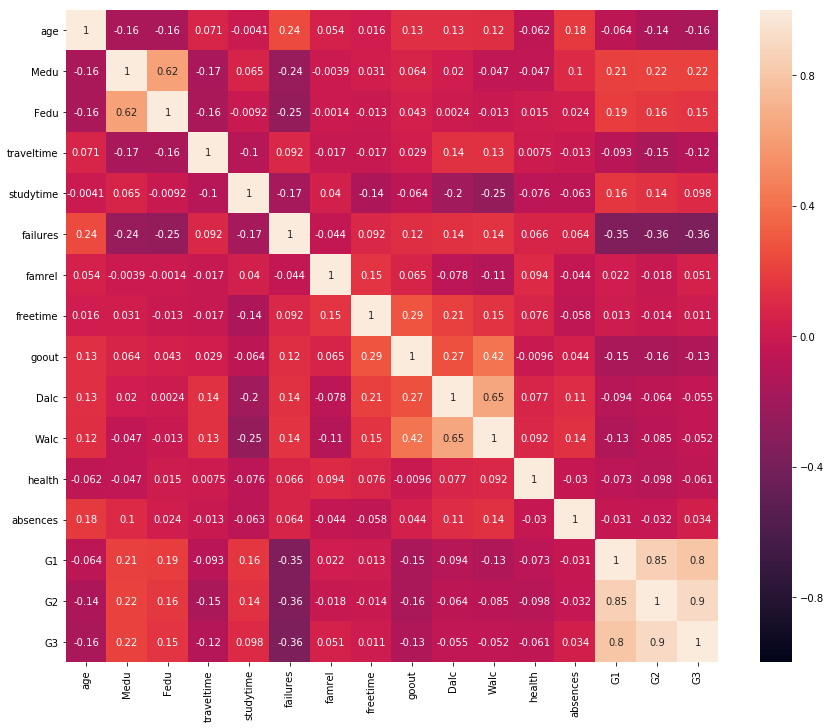

In [39]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), vmax=1,vmin=-1, annot=True, square=True)

# Machine Learning

# Encoding

In [40]:
data = pd.get_dummies(data)

# Data Splitting

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop(['G3'], axis=1)
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
X_new.shape

print(selector.get_support(indices=True))

X.columns[selector.get_support(indices=True)].tolist()

[ 5 13 14 59 60]


['failures', 'G1', 'G2', 'Ranking_Average', 'Ranking_Good']

## Models

### Lasso

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print(cv_scores.mean())

0.806489384015995


### Feature Selection

In [45]:
from sklearn.feature_selection import RFE

rfe = RFE(lasso, 10)
fit = rfe.fit(X_train, y_train)

print("Num Features:", fit.n_features_)
print("Feature Ranking:", fit.ranking_)

Num Features: 10
Feature Ranking: [52 51 50 49 48 47 46 45 44 43 42 41  1  1  1  7  6  5  4  3  9 11 13 15
 17 19 21 23 25 27 29 31 33 35 37 39 40 38 36 34 32 30 28 26 24 22 20 18
 16 14 12 10  8  2  1  1  1  1  1  1  1]


In [46]:
X_train_reduced = rfe.fit_transform(X_train, y_train)

### Submission

In [47]:
submission = pd.DataFrame({
        "Id": y_test.index,
        "G3": pred_lasso
    })

submission.to_csv('submission.csv', index=False)

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

In [49]:
cv_score = cross_val_score(lr, X_test, y_test, cv=20, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))

### Submission

In [50]:
submission = pd.DataFrame({
        "Id": y_test.index,
        "G3": pred_lr
    })

submission.to_csv('submission_lr.csv', index=False)

### Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rfr.fit(X_train, y_train)

pred_rfr = rfr.predict(X_test)

In [52]:
cv_score = cross_val_score(rfr, X_test, y_test, cv=20, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))

### Feature Importance 

In [53]:
feature_importance = pd.DataFrame({'Features': X_train.columns, 
                                  'Importance': rfr.feature_importances_})

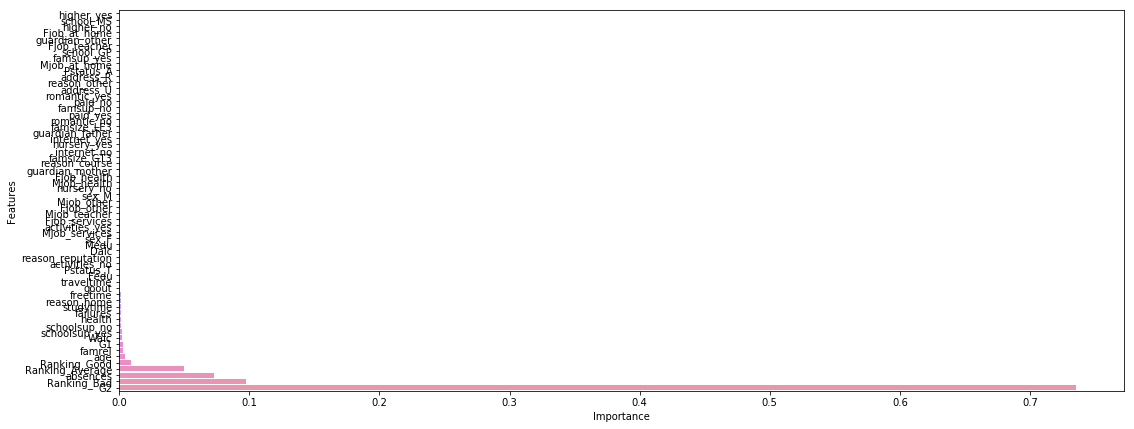

In [54]:
plt.figure(figsize = (18,7))
sns.barplot(x="Importance", y="Features", data=feature_importance.sort_values(by=['Importance']))

### Submission

In [55]:
submission = pd.DataFrame({
        "Id": y_test.index,
        "G3": pred_rfr
    })

submission.to_csv('submission_rfr.csv', index=False)